In [37]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image as Im
import scipy.io as spio
from IPython.display import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gustavo Almeida Valentim
## Matrícula: 20/2014468

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [38]:
### Código da questão 1a.
def decimacao_2(x_signal):
    y_signal = []
    for i in range(int((len(x_signal))/2)):    #metade da amostragem
        y_signal.append(x_signal[i*2])
    return y_signal

x_signal = [1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0]
y_signal = decimacao_2(x_signal)
y_signal

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [39]:
### Código da questão 1b.
def interpolacao_2(y_signal, opcao):
    """Realiza a interpolação de um sinal discreto.

    Args:
        y_signal (list): lista com os valores do sinal discreto.
        opcao (str): método de interpolação: 'valor_medio' ou 'amostra_anterior'.

    Returns:
        list: lista com os valores do sinal interpolado.
    """
    z_signal = []  # cria uma lista vazia para o sinal interpolado
    for i in range(len(y_signal)):
        # adiciona o valor atual à lista de sinal interpolado
        z_signal.append(y_signal[i])
        if i < len(y_signal) - 1:
            # se não for o último elemento, realiza a interpolação
            if opcao == 'valor_medio':
                # interpolação por valor médio
                z_signal.append(int((y_signal[i] + y_signal[i+1])/2))
            elif opcao == 'amostra_anterior':
                # interpolação por amostra anterior
                z_signal.append(y_signal[i])
        else:
            # se for o último elemento, adiciona o valor interpolado final
            if opcao == 'valor_medio':
                # interpolação por valor médio
                z_signal.append(int((z_signal[-1] + y_signal[i])/2))
            elif opcao == 'amostra_anterior':
                # interpolação por amostra anterior
                z_signal.append(y_signal[i])
    return z_signal

# Teste da função
y_signal = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
z_signal = interpolacao_2(y_signal, opcao='valor_medio')  # Interpolação por valor médio
print(z_signal)

z_signal = interpolacao_2(y_signal, opcao='amostra_anterior')  # Interpolação por amostra anterior
print(z_signal)

# Perceba que tem os mesmos valores pois a media de 1+1/2 é 1

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512


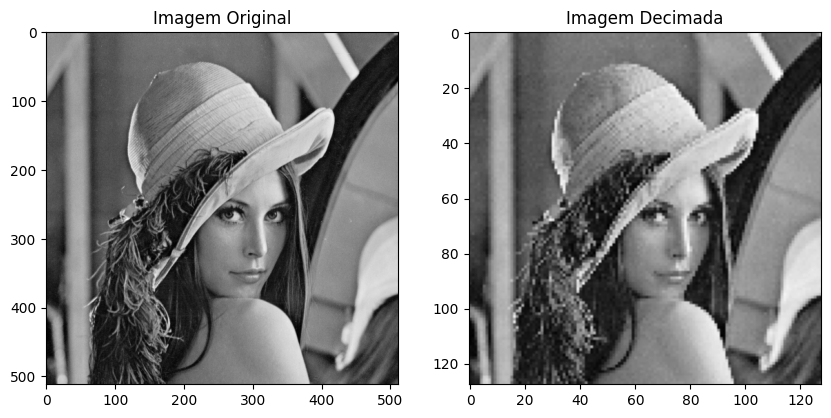

128

In [60]:

im = Im.open("lena.bmp").convert("L")
A = np.array(im)
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')

# Aplica a decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16)
B = A
for i in range(4):
    B = decimacao_2(B)
    B = np.array(B).T.tolist()  # Aplica a transposição

# Exibe a imagem original e a imagem decimada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(im, cmap='gray')
ax1.set_title('Imagem Original')

ax2.imshow(B, cmap='gray')
ax2.set_title('Imagem Decimada')

plt.show()

len(B)


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

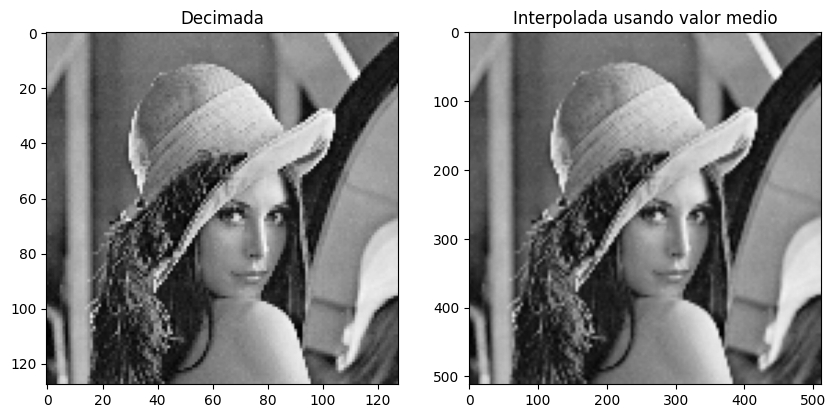

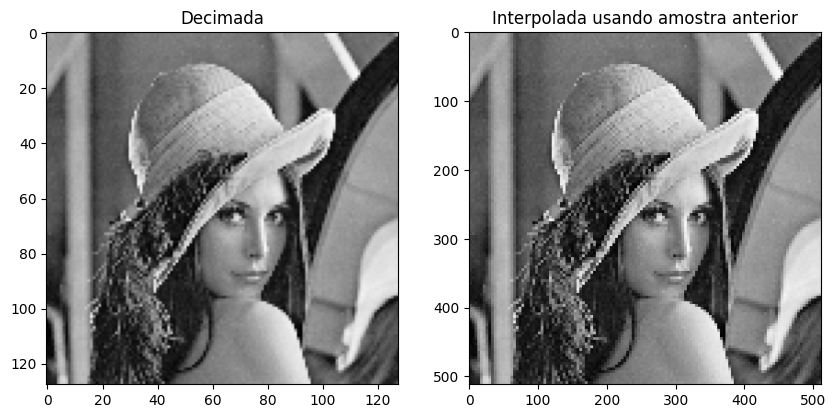

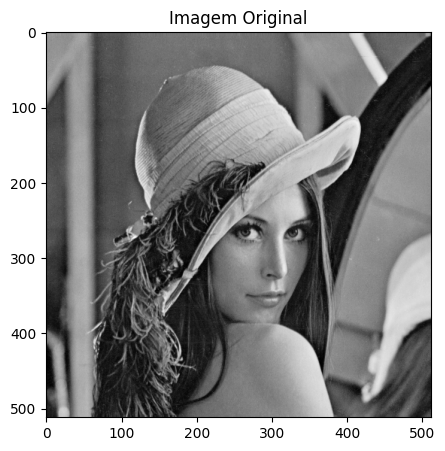

In [51]:
def interpolacao_2(y_signal, opcao):
    """Realiza a interpolação de um sinal discreto.

    Args:
        y_signal (list): lista com os valores do sinal discreto.
        opcao (str): método de interpolação: 'valor_medio' ou 'amostra_anterior'.

    Returns:
        list: lista com os valores do sinal interpolado.
    """
    z_signal = []  # inicializa a lista z_signal
    for i in range(len(y_signal)):
        # adiciona o valor atual à lista de sinal interpolado
        z_signal.append(y_signal[i])
        if i < len(y_signal) - 1:
            # se não for o último elemento, realiza a interpolação
            if opcao == 'valor_medio':
                # interpolação por valor médio
                z_signal.append(int((y_signal[i] + y_signal[i+1])/2))
            elif opcao == 'amostra_anterior':
                # interpolação por amostra anterior
                z_signal.append(y_signal[i])
        else:
            # se for o último elemento, adiciona o valor interpolado final
            if opcao == 'valor_medio':
                # interpolação por valor médio
                z_signal.append(int((z_signal[-1] + y_signal[i])/2))
            elif opcao == 'amostra_anterior':
                # interpolação por amostra anterior
                z_signal.append(y_signal[i])
    return z_signal

# sinal original
#y_signal = [0, 1, 0]

# interpolação por valor médio quatro vezes
C = B

for i in range(4):
    C = np.apply_along_axis(interpolacao_2, axis=0, arr=C, opcao='valor_medio')
    C = np.array(C).T.tolist()

len(C)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(B, cmap ='gray')
ax1.set_title('Decimada')
ax2.imshow(C, cmap='gray')
ax2.set_title('Interpolada usando valor medio')
plt.show()

# Code with value medium

C = B

for i in range(4):
    C = np.apply_along_axis(interpolacao_2, axis=0, arr=C, opcao='amostra_anterior')
    C = np.array(C).T.tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(B, cmap ='gray')
ax1.set_title('Decimada')
ax2.imshow(C, cmap='gray')
ax2.set_title('Interpolada usando amostra anterior')
plt.show()

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(A, cmap='gray')
ax.set_title('Imagem Original')
plt.show()


# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

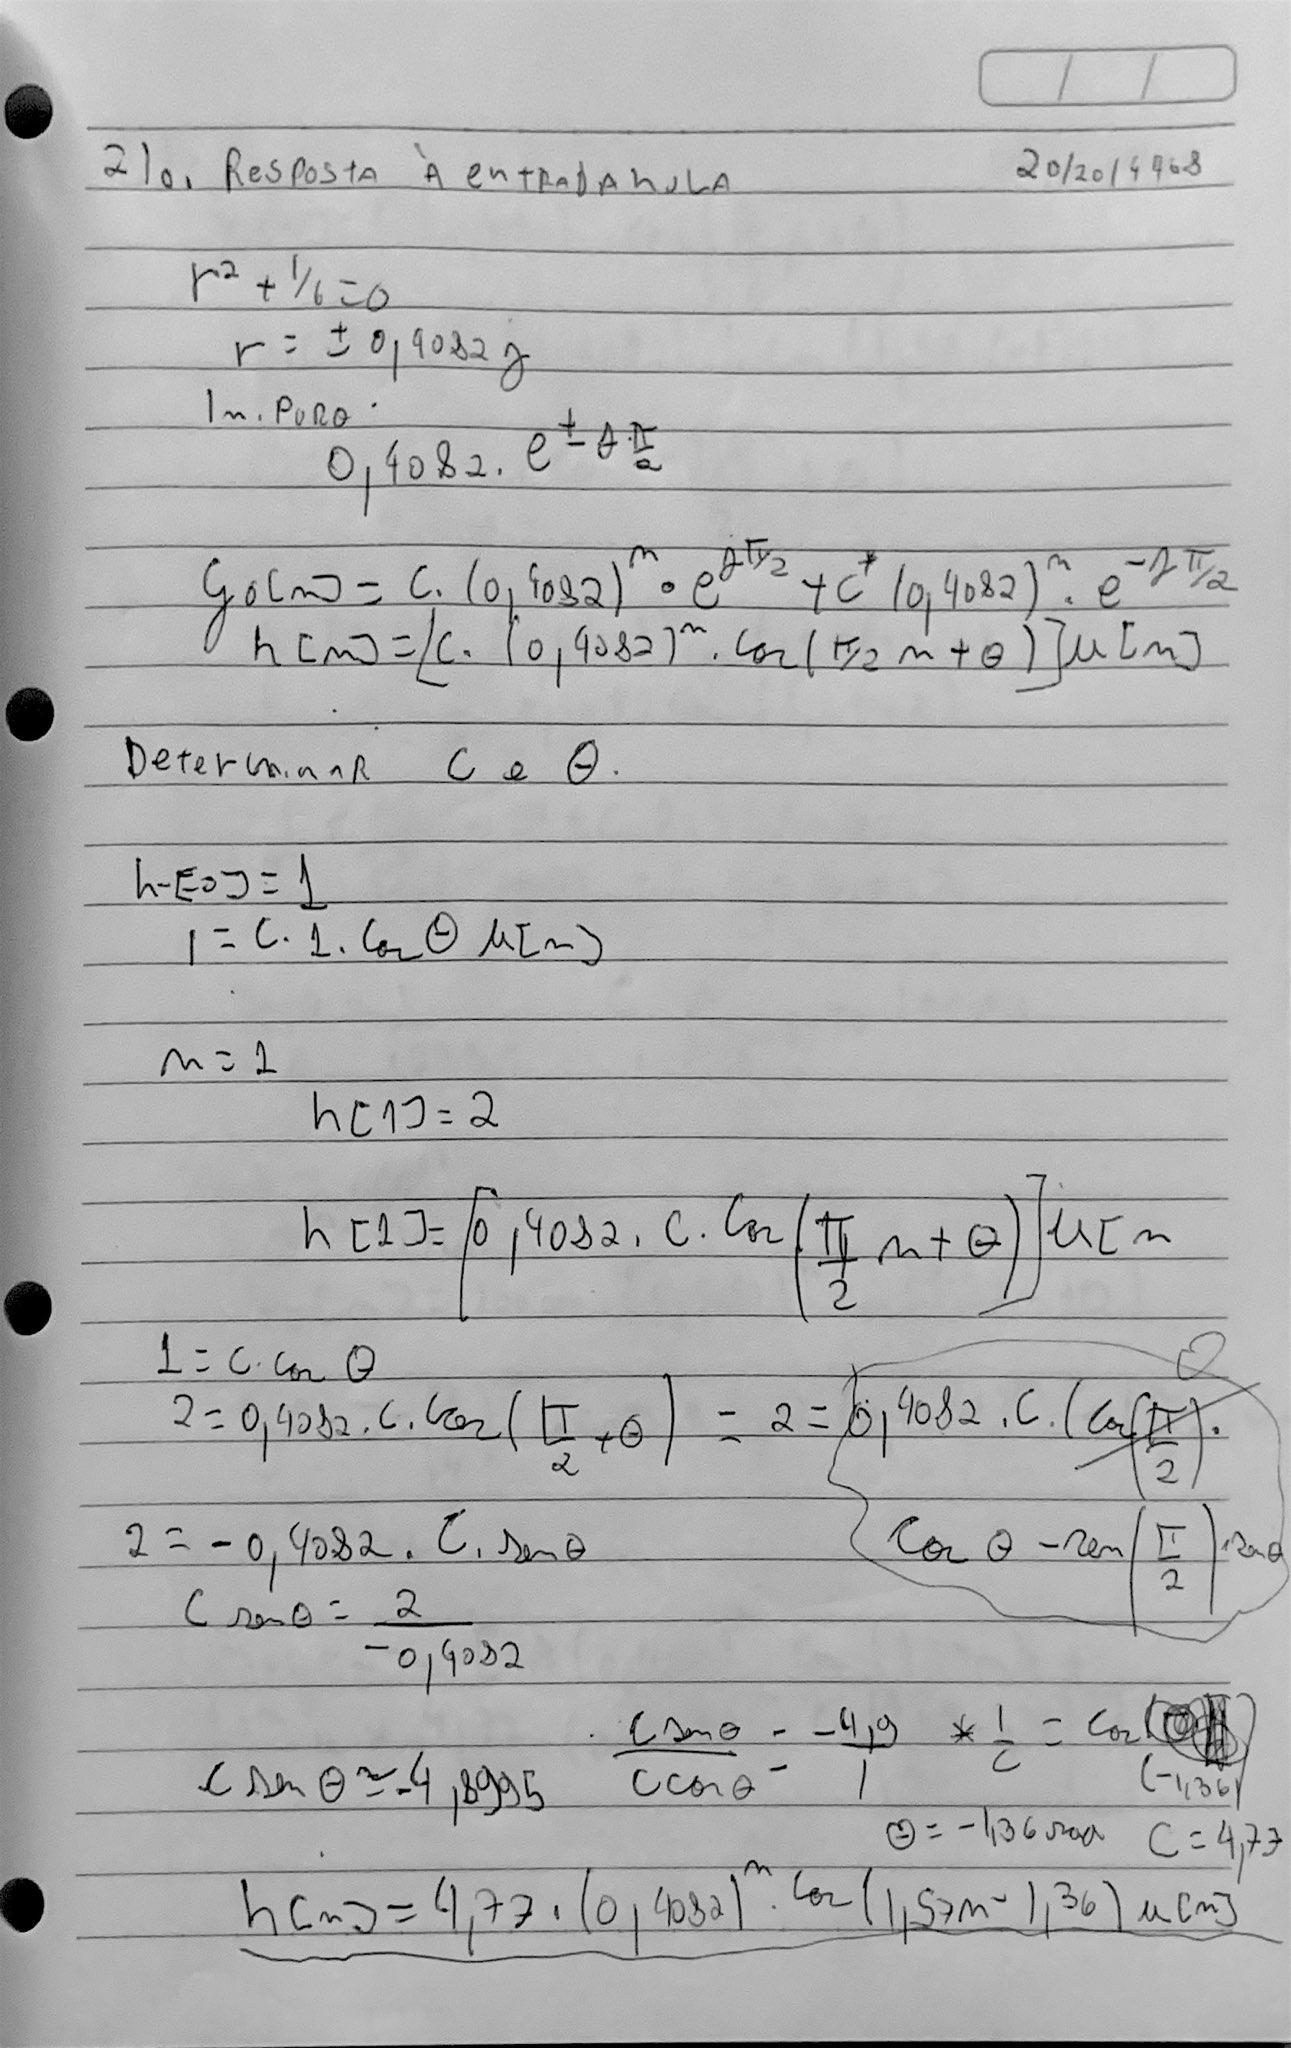

In [61]:
Image(filename='2A.jpg')

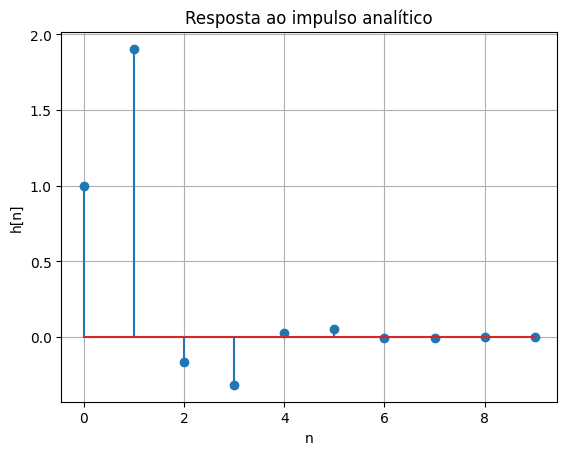

In [62]:
#resposta analitica para 10  amostras
def h_analitico(n):
    #print(n)
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    for i in range(len(n)):
        result[i] = 4.77*(0.4082 ** i) * np.cos((1.57 * i)-1.36)
    return result

n = np.arange(0, 10)
plt.stem(n, h_analitico(n))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Resposta ao impulso analítico')
plt.grid()
plt.show()

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

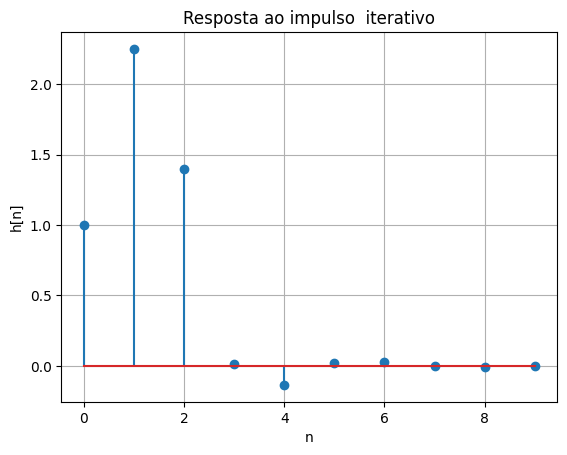

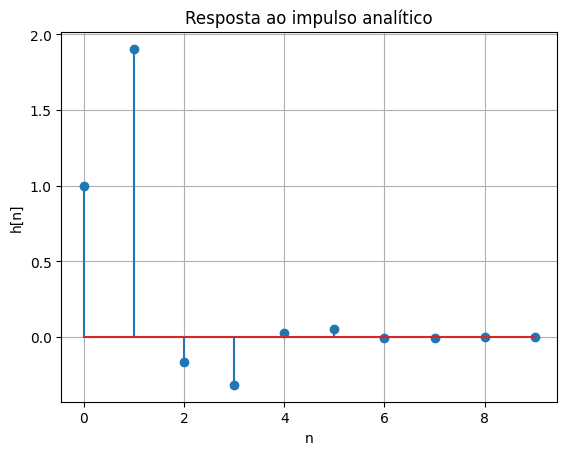

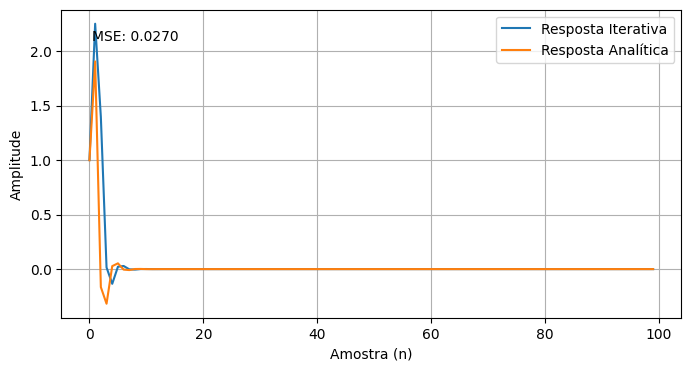

MSE: 0.0269528936634301


In [63]:
def h(n):
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    
    for i in range(len(n)):
        #print(result)
        if i >= 0:
            if i >= 2:
                result[i] = ((1/4)**i) + 2*((1/4)**(i-1)) + ((1/4)**(i-2)) - ((1/6)*(result[i-2]))
            elif i == 1:
                result[i] = ((1/4)**i) + (2*((1/4)**(i-1)))
            elif i == 0:
                result[i] = ((1/4)**i)
        else:
            result[i] = 0
    return result

n = np.arange(0, 10)
plt.stem(n, h(n))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Resposta ao impulso  iterativo')
plt.grid()
plt.show()
#resposta analitica para 10  amostras

def h_analitico(n):
    #print(n)
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    for i in range(len(n)):
        result[i] = 4.77*(0.4082 ** i) * np.cos((1.57 * i)-1.36)
    return result

n = np.arange(0, 10)
plt.stem(n, h_analitico(n))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Resposta ao impulso analítico')
plt.grid()
plt.show()


#MSE

n = np.arange(0, 100)

h_iterativo = h(n)
#print(h_iterativo)
h_analitico = h_analitico(n)

mse = np.mean((h_iterativo[:100] - h_analitico[:100])**2)

# Plotando as duas respostas
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n, h_iterativo, label='Resposta Iterativa')
ax.plot(n, h_analitico, label='Resposta Analítica')
ax.set_xlabel('Amostra (n)')
ax.set_ylabel('Amplitude')
ax.legend()

# Plotando o MSE
ax.text(0.05, 0.9, f'MSE: {mse:.4f}', transform=ax.transAxes)

plt.grid()
plt.show()

print('MSE:', mse)


O MSE obtido de 0.0269 indica que a aproximação entre as duas respostas ao impulso, a resposta iterativa e a resposta analítica, não é perfeita, mas é razoavelmente boa. Um MSE baixo indica que as duas respostas estão próximas em termos de amplitude.

A diferença inicial maior entre as respostas e a diminuição dessa diferença ao longo do tempo pode ser explicada pelas características do sistema em questão. O sistema possui uma resposta ao impulso recursiva, o que significa que cada amostra depende das amostras anteriores. No início, quando n é pequeno, a resposta iterativa ainda está se ajustando e acumulando contribuições de amostras anteriores, o que pode resultar em uma diferença maior em relação à resposta analítica.

Conforme o tempo avança e mais amostras são consideradas, a resposta iterativa se aproxima mais da resposta analítica, uma vez que as contribuições iniciais e os efeitos transitórios se tornam menos significativos e a resposta se estabiliza.

Em resumo, a diferença inicial maior e a diminuição gradual dessa diferença ao longo do tempo são características esperadas em sistemas com resposta ao impulso recursiva, como o sistema analisando.

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

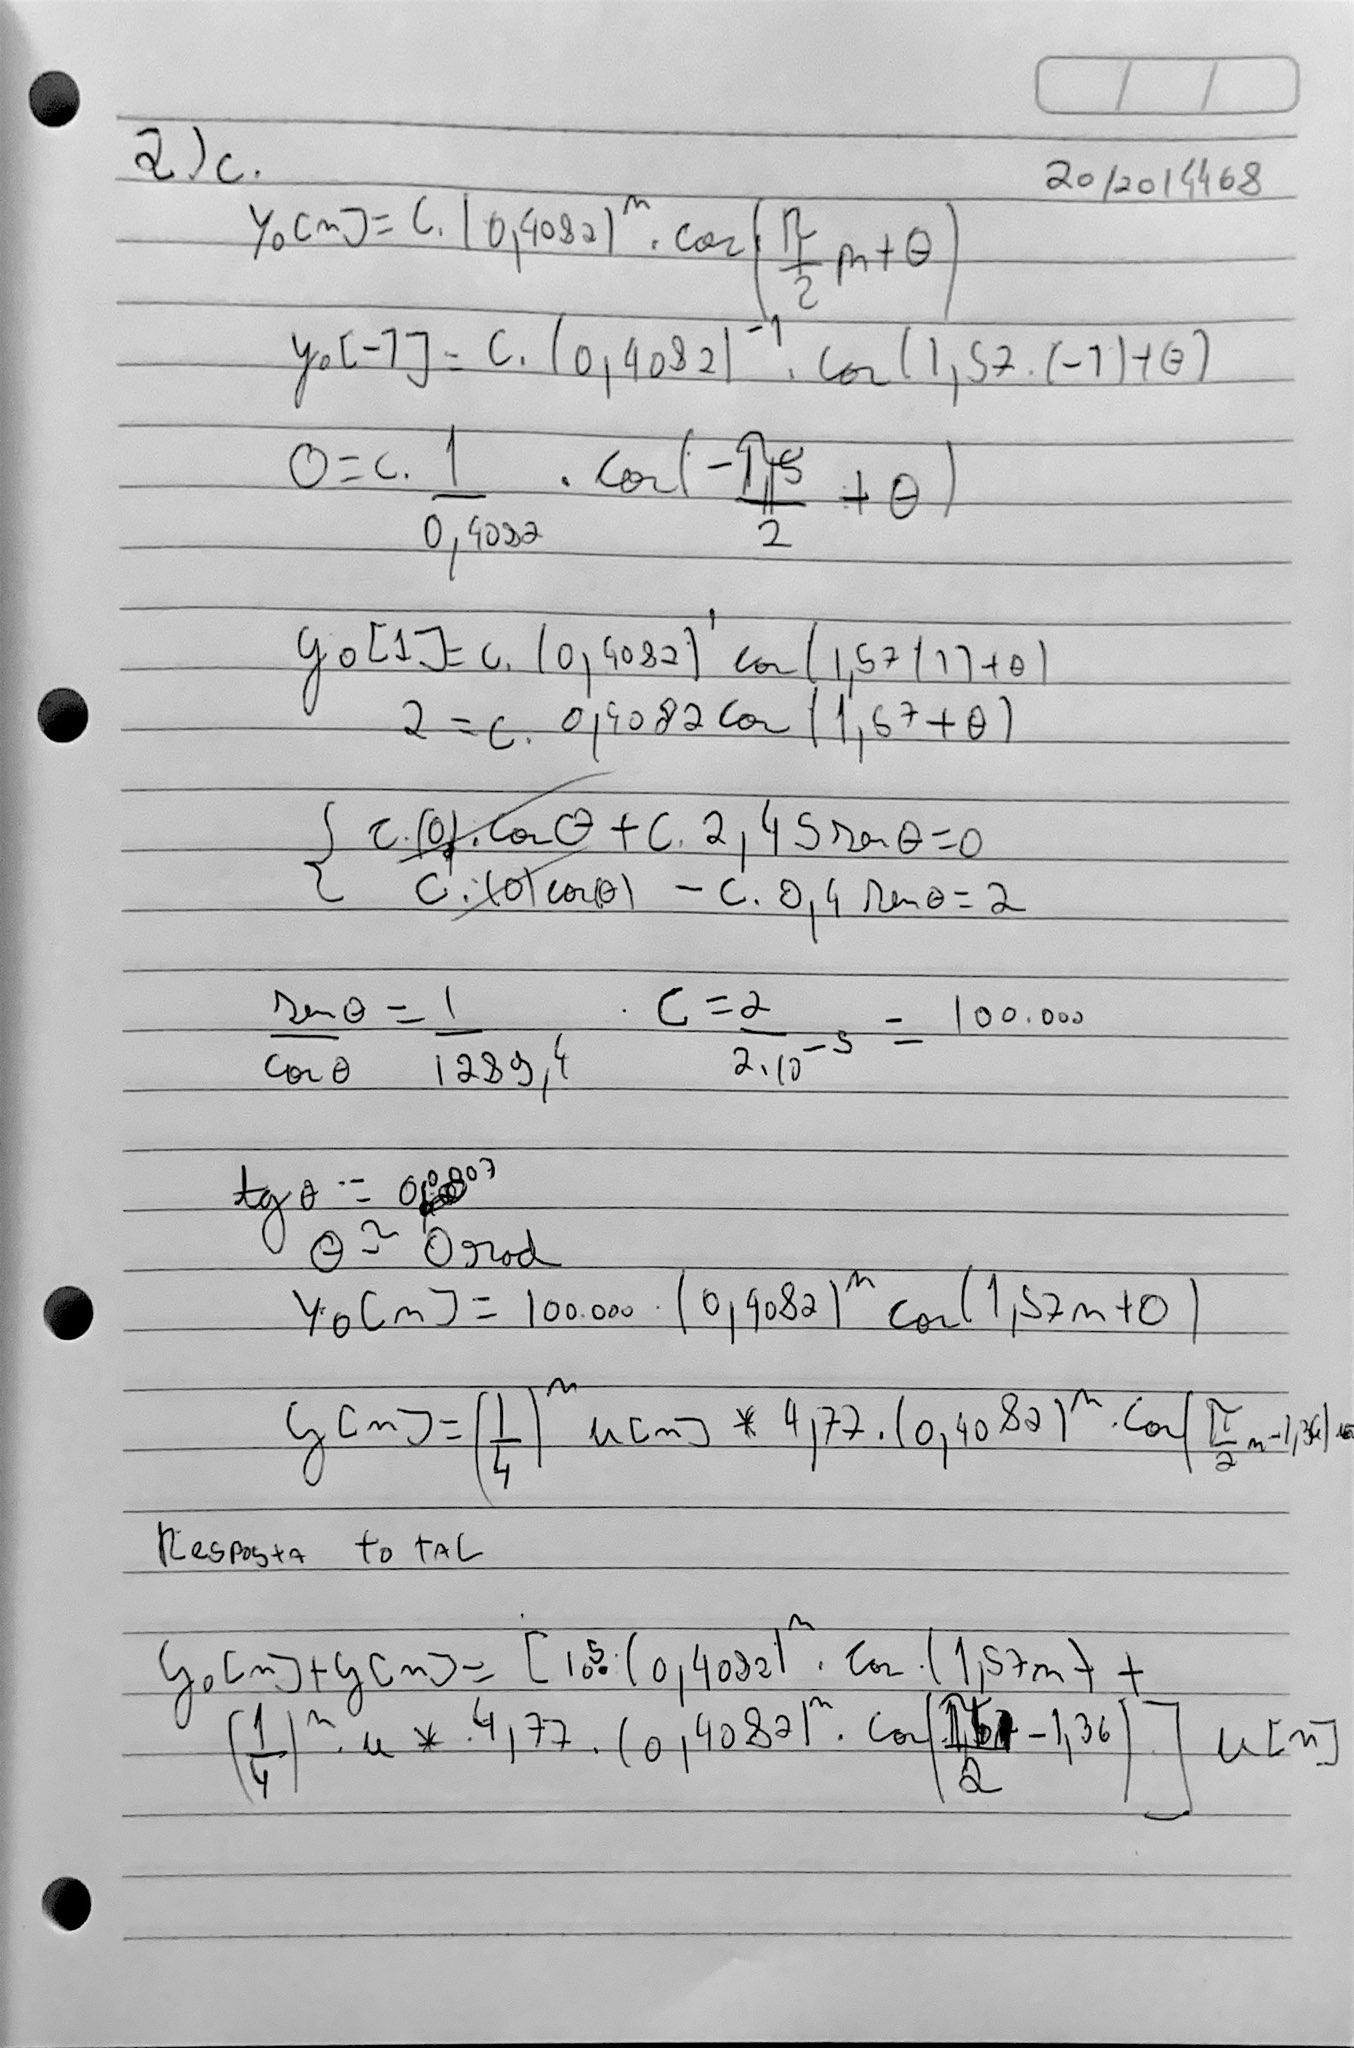

In [64]:
### Código da questão 2c.
Image(filename='2C.jpg')

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

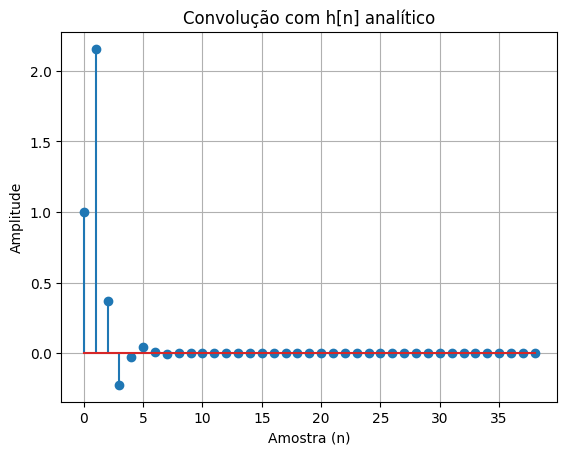

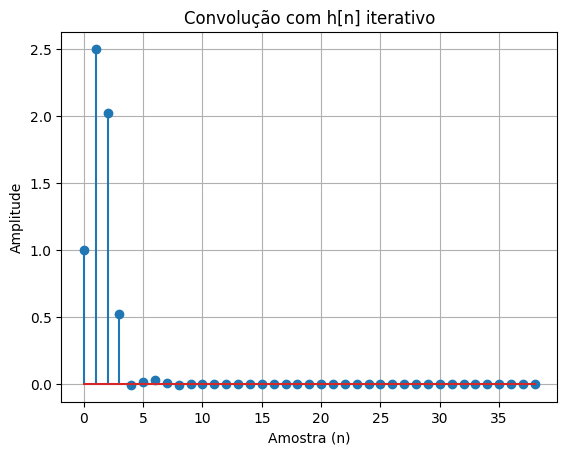

Erro médio quadrático: 0.08694522771044785


In [65]:
n = np.arange(20)  # Array de índices
x = (1/4) ** n  # Sinal de entrada com 20 amostras de (1/4)**n

#print(x)

h_analitico = h_analitico[:20]
h_iterativo = h_iterativo[:20]

# Convolução com h[n] analítico
y_analitico = np.convolve(x, h_analitico)

# Plot do sinal de saída com h[n] analítico
plt.stem(y_analitico[:100])
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude')
plt.title('Convolução com h[n] analítico')
plt.grid(True)
plt.show()

# Convolução com h[n] iterativo
y_iterativo = np.convolve(x, h_iterativo)

# Plot do sinal de saída com h[n] iterativo
plt.stem(y_iterativo[:100])
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude')
plt.title('Convolução com h[n] iterativo')
plt.grid(True)
plt.show()

# Cálculo do erro médio quadrático
mse = np.mean((y_analitico[:100] - y_iterativo[:100]) ** 2)
print('Erro médio quadrático:', mse)

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

## Para essa questão eu decidi usar a reposta iterativa do sistema

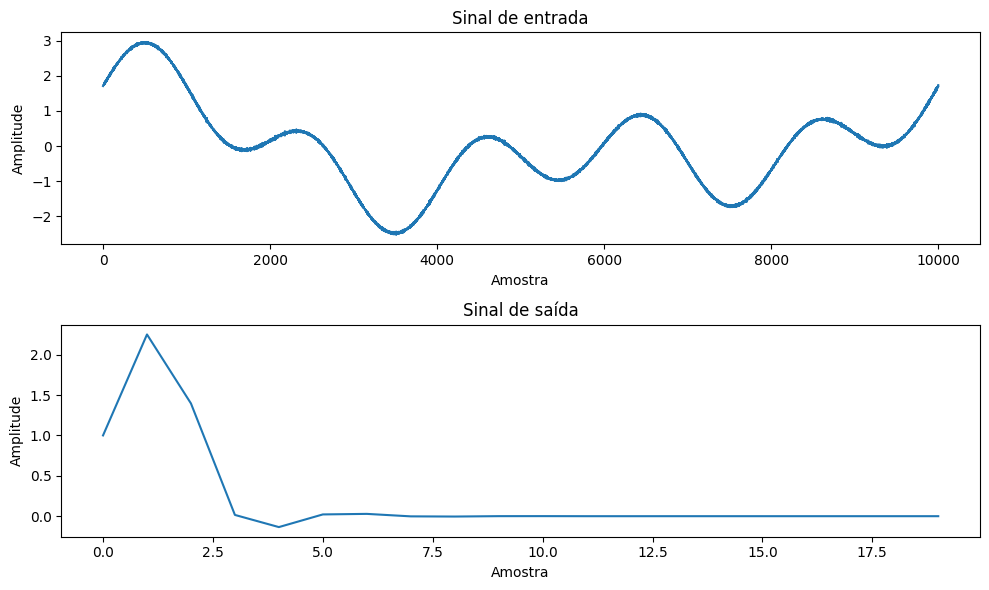

In [66]:
# Carregar o sinal do arquivo .mat
data = spio.loadmat('data_projeto1.mat')
sinal = data['sinal'].ravel()

# Definir a resposta em frequência (cossenoide)
def h(sinal):
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    
    for i in range(len(n)):
        if i >= 0:
            if i >= 2:
                result[i] = ((1/4)**i) + 2*((1/4)**(i-1)) + ((1/4)**(i-2)) - ((1/6)*(result[i-2]))
            elif i == 1:
                result[i] = ((1/4)**i) + (2*((1/4)**(i-1)))
            elif i == 0:
                result[i] = ((1/4)**i)
        else:
            result[i] = 0
    return result

# Realizar a convolução entre o sinal de entrada e a resposta em frequência
saida = h(sinal)

# Plotar o gráfico da entrada e saída do sistema
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.title('Sinal de entrada')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(saida)
plt.title('Sinal de saída')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

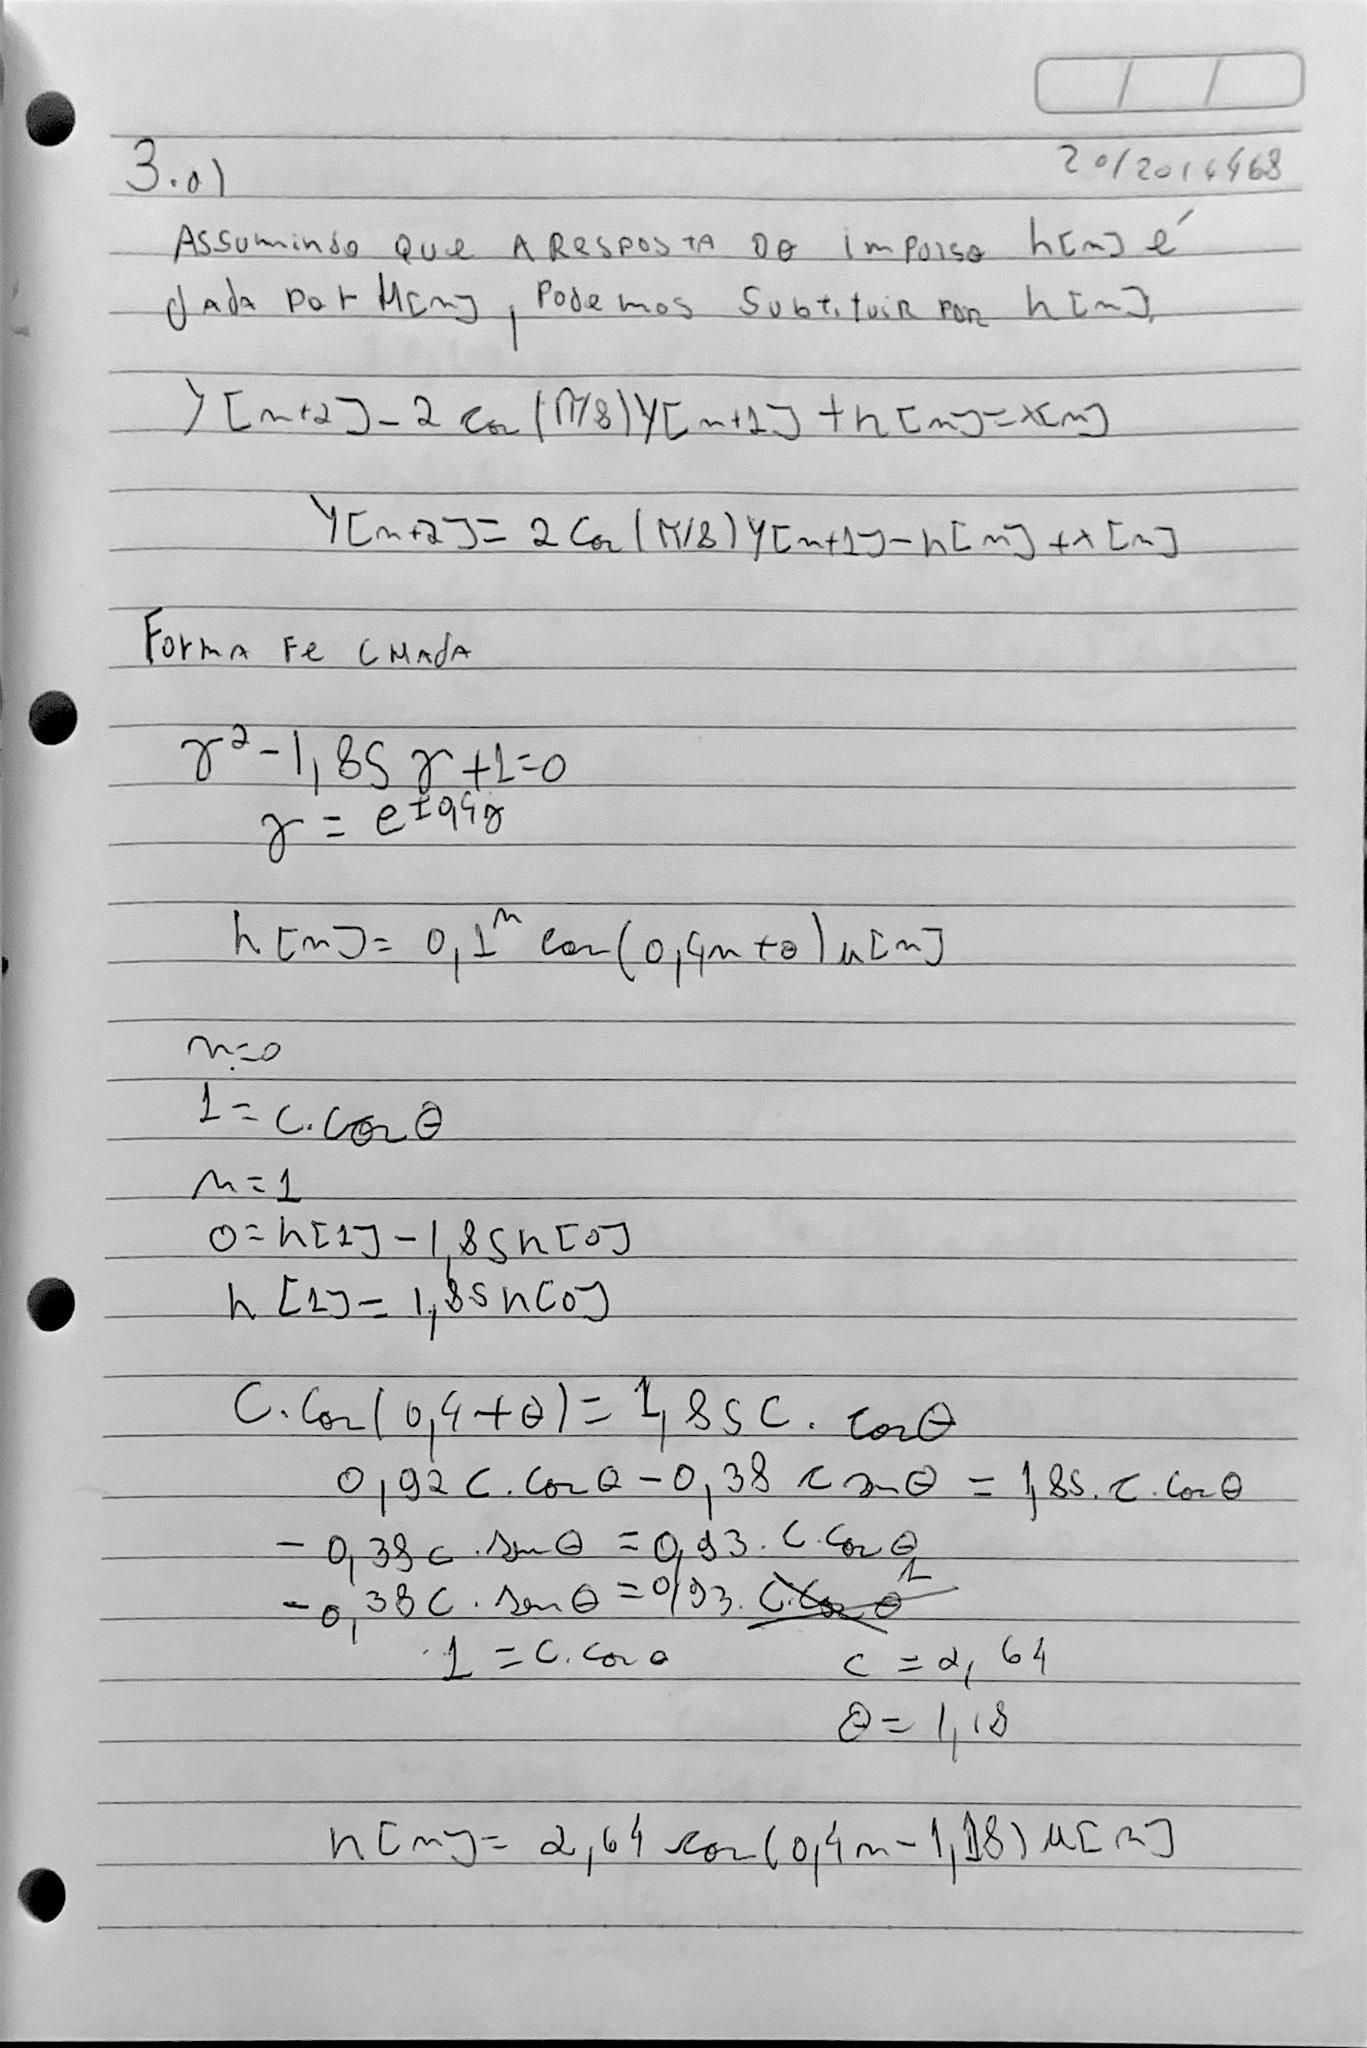

In [67]:

Image(filename='3A.jpg')


## A equação de recorrência nos permite calcular y[n + 2] com base em y[n + 1], h[n] e x[n]. Utilizando técnicas de análise de sistemas lineares, podemos encontrar uma expressão para y[n] em termos de n e h[n]. Essa expressão será então utilizada para calcular y[n + 2] em termos de n, h[n] e x[n]. Dessa forma, podemos obter a resposta ao impulso h[n] analiticamente, estabelecendo uma relação entre os valores de y[n], h[n], n e x[n].

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

## Eu ajustei um pouco a resposta analítica, decidi deslocar ela um pouco para diminuir o erro quadratico e a  aproximação ficou consideravelmente boa

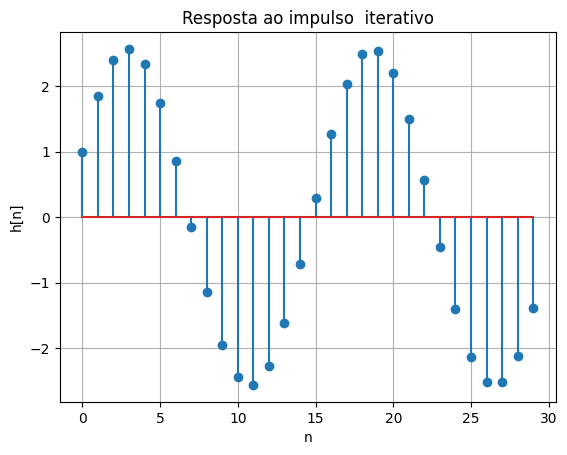

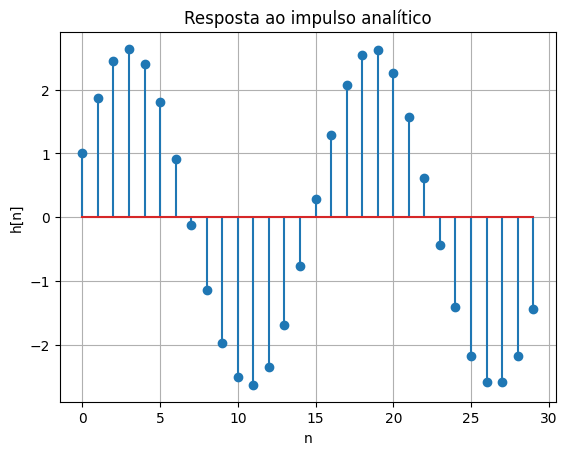

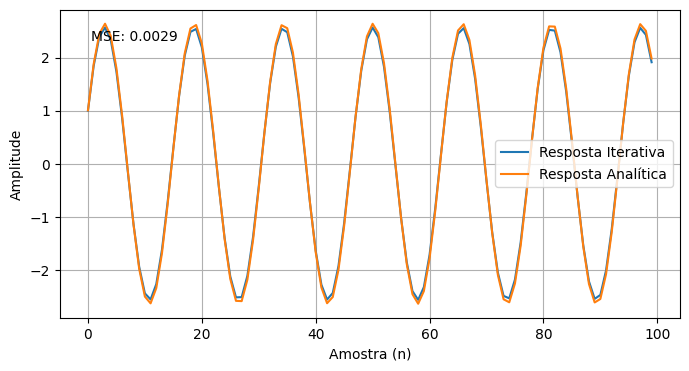

MSE: 0.0029094173206995065


In [68]:
### Código da questão 3b

def h(n):
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    for i in range(len(n)):
        #print(result)
        if i >= 0:
            if i >= 1:
                result[i] = (2*(np.cos(0.4))*result[i-1]) - (result[i-2])
            elif i == 0:
                result[i] = 1
        else:
            result[i] = 0
    return result

n = np.arange(0, 30)
plt.stem(n, h(n))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Resposta ao impulso  iterativo')
plt.grid()
plt.show()

#resposta analitica para 100  amostras
def h_analitico(n):
    #print(n)
    result = np.zeros_like(n, dtype=float)  # Initialize an array of zeros with the same shape as n
    for i in range(len(n)):
        result[i] = (2.64 * np.cos((0.4*i)-1.18))
    return result

n = np.arange(0, 30)
plt.stem(n, h_analitico(n))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Resposta ao impulso analítico')
plt.grid()
plt.show()


#MSE

n = np.arange(0, 100)

h_iterativo = h(n)
h_analitico = h_analitico(n)

mse = np.mean((h_iterativo[:100] - h_analitico[:100])**2)

# Plotando as duas respostas
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n, h_iterativo, label='Resposta Iterativa')
ax.plot(n, h_analitico, label='Resposta Analítica')
ax.set_xlabel('Amostra (n)')
ax.set_ylabel('Amplitude')
ax.legend()

# Plotando o MSE
ax.text(0.05, 0.9, f'MSE: {mse:.4f}', transform=ax.transAxes)

plt.grid()
plt.show()

print('MSE:', mse)